In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
data = pd.read_csv("data/hundred_Batches_IndPenSim_V3.csv")
data_summary = pd.read_csv("data/100_Batches_IndPenSim_Statistics.csv")

In [18]:
data.shape


(113935, 2239)

In [19]:
data_summary.shape

(100, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [6]:
data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [7]:
data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [21]:
data_summary

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0
...,...,...,...,...,...
95,96,1141500.0,2453400.0,3595000.0,1
96,97,1439400.0,2454900.0,3894300.0,1
97,98,799760.0,930830.0,1730600.0,1
98,99,388650.0,502180.0,890830.0,1


In [27]:
data_summary.describe().round(0)


,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
count,100.0,100.0,100.0,100.0,100.0
mean,50.0,1108662.0,1920394.0,3029064.0,0.0
std,29.0,266807.0,581462.0,750817.0,0.0
min,1.0,388650.0,502180.0,890830.0,0.0
25%,26.0,969212.0,1413400.0,2532800.0,0.0
50%,50.0,1095850.0,2090150.0,3141650.0,0.0
75%,75.0,1197850.0,2375200.0,3590200.0,0.0
max,100.0,2089700.0,2932400.0,4447700.0,1.0


In [105]:
df = data.iloc[:, :33]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Time (h)                                                            113935 non-null  float64
 1   Aeration rate(Fg:L/h)                                               113935 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                               113935 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                             113935 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                              113935 non-null  float64
 5   Base flow rate(Fb:L/h)                                              113935 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                             113935 non-null  float64
 7   He

In [107]:
df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,NaN,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,NaN,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,NaN,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,NaN,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,1667.8,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,NaN,0.323420,0.19996,NaN,NaN,0.995500,0,NaN,0,0
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,NaN,0.316620,0.20002,NaN,NaN,0.995220,0,NaN,0,0
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,NaN,0.311680,0.20006,NaN,NaN,0.994940,0,NaN,0,0
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,NaN,0.311780,0.20006,NaN,NaN,0.994660,0,NaN,0,0


In [108]:
print(df.isnull().sum())

Time (h)                                                                   0
Aeration rate(Fg:L/h)                                                      0
Agitator RPM(RPM:RPM)                                                      0
Sugar feed rate(Fs:L/h)                                                    0
Acid flow rate(Fa:L/h)                                                     0
Base flow rate(Fb:L/h)                                                     0
Heating/cooling water flow rate(Fc:L/h)                                    0
Heating water flow rate(Fh:L/h)                                            0
Water for injection/dilution(Fw:L/h)                                       0
Air head pressure(pressure:bar)                                            0
Dumped broth flow(Fremoved:L/h)                                            0
Substrate concentration(S:g/L)                                             0
Dissolved oxygen concentration(DO2:mg/L)                                   0

In [109]:
df.describe().round(5)


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
count,113935.00000,113935.00000,113935.0,113935.00000,113935.00000,113935.00000,113935.00000,113935.00000,113935.00000,113935.00000,...,2062.00000,113935.00000,113935.00000,2062.00000,2062.00000,113935.00000,113935.0,2062.00000,113935.00000,113935.00000
mean,114.75066,65.24636,100.0,76.66376,0.07321,61.33439,74.34634,20.76303,154.81195,0.94503,...,1961.84326,1.25821,0.19146,14.43945,18.79910,1.25010,0.0,51.54645,0.01102,0.30179
std,66.99050,11.69021,0.0,25.68013,0.55279,44.97271,108.02260,50.23027,155.60147,0.13427,...,542.28706,0.46327,0.00472,10.26091,7.01632,0.48409,0.0,24.07378,0.10441,0.45904
min,0.20000,20.00000,100.0,2.00000,0.00000,0.00000,0.00010,0.00010,0.00000,0.60000,...,1391.60000,-1.24200,0.12950,0.00000,0.39381,0.02868,0.0,4.07530,0.00000,0.00000
25%,57.00000,60.00000,100.0,72.00000,0.00000,35.76600,11.15700,0.00010,0.00000,0.90000,...,1693.57500,1.01400,0.18886,5.33693,16.62600,0.97811,0.0,34.81225,0.00000,0.00000
50%,114.00000,65.00000,100.0,80.00000,0.00000,55.40700,34.38400,0.15901,100.00000,0.90000,...,1790.90000,1.26580,0.19118,14.56700,21.44900,1.40260,0.0,53.15400,0.00000,0.00000
75%,171.00000,75.00000,100.0,90.00000,0.00000,76.27150,94.90450,11.64050,250.00000,1.10000,...,1918.70000,1.60360,0.19366,23.11275,23.67225,1.62145,0.0,73.53600,0.00000,1.00000
max,290.00000,75.00000,100.0,150.00000,12.99600,225.00000,1500.00000,1500.00000,500.00000,1.10000,...,5170.00000,6.76110,0.22751,36.18000,27.88200,2.04880,0.0,117.93000,1.00000,1.00000


In [110]:
for i in df.columns:
    print(i, ":", df[i].nunique())
    print('-'*80)

Time (h) : 1450
--------------------------------------------------------------------------------
Aeration rate(Fg:L/h) : 7
--------------------------------------------------------------------------------
Agitator RPM(RPM:RPM) : 1
--------------------------------------------------------------------------------
Sugar feed rate(Fs:L/h) : 25
--------------------------------------------------------------------------------
Acid flow rate(Fa:L/h) : 1353
--------------------------------------------------------------------------------
Base flow rate(Fb:L/h) : 67206
--------------------------------------------------------------------------------
Heating/cooling water flow rate(Fc:L/h) : 77380
--------------------------------------------------------------------------------
Heating water flow rate(Fh:L/h) : 54534
--------------------------------------------------------------------------------
Water for injection/dilution(Fw:L/h) : 6
-----------------------------------------------------------------

## Determinando el inicio y el final de los lotes 

In [ ]:
batch_start_indices = df['Time (h)'].index[df['Time (h)'] == 0.2]
batch_start_indices

Index([     0,   1130,   2280,   3670,   4820,   5715,   6865,   8025,   9175,
        10435,  11585,  12595,  13745,  14825,  15975,  16880,  18030,  18970,
        20120,  21155,  22305,  23445,  24595,  25915,  27065,  28370,  29520,
        30575,  31725,  33175,  34325,  35575,  36725,  38025,  39175,  40155,
        41305,  42355,  43505,  44680,  45830,  47045,  48195,  49350,  50500,
        51810,  52960,  54100,  55250,  56410,  57560,  58685,  59835,  60800,
        61950,  63070,  64220,  65390,  66540,  67560,  68710,  69915,  71065,
        72215,  73365,  74520,  75670,  76505,  77655,  78780,  79930,  81000,
        82150,  83330,  84480,  85440,  86590,  87615,  88765,  89940,  91090,
        92190,  93340,  94545,  95695,  96695,  97845,  98955, 100105, 101260,
       102410, 103700, 104850, 105900, 107050, 108105, 109255, 110380, 111530,
       112785],
      dtype='int64')

In [ ]:
def find_batch_end_indices(df):
    indices_0_2 = df[df['Time (h)'] == 0.2].index
    indices_before_0_2 = indices_0_2 - 1
    indices_before_0_2_filtered = indices_before_0_2[indices_before_0_2 > 0]
    indices_before_0_2_filtered_mask = indices_before_0_2_filtered > 0
    return indices_before_0_2_filtered[indices_before_0_2_filtered_mask]
batch_end_indices = find_batch_end_indices(df.copy())
batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))

print(batch_end_indices)

Index([  1129,   2279,   3669,   4819,   5714,   6864,   8024,   9174,  10434,
        11584,  12594,  13744,  14824,  15974,  16879,  18029,  18969,  20119,
        21154,  22304,  23444,  24594,  25914,  27064,  28369,  29519,  30574,
        31724,  33174,  34324,  35574,  36724,  38024,  39174,  40154,  41304,
        42354,  43504,  44679,  45829,  47044,  48194,  49349,  50499,  51809,
        52959,  54099,  55249,  56409,  57559,  58684,  59834,  60799,  61949,
        63069,  64219,  65389,  66539,  67559,  68709,  69914,  71064,  72214,
        73364,  74519,  75669,  76504,  77654,  78779,  79929,  80999,  82149,
        83329,  84479,  85439,  86589,  87614,  88764,  89939,  91089,  92189,
        93339,  94544,  95694,  96694,  97844,  98954, 100104, 101259, 102409,
       103699, 104849, 105899, 107049, 108104, 109254, 110379, 111529, 112784,
       113934],
      dtype='int64')


In [ ]:
results_df_st = df.iloc[batch_start_indices]
results_df_st

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
0,0.2,30,100,8,0.0,30.1180,9.8335,0.0001,0,0.6,...,NaN,0.48051,0.19595,NaN,NaN,0.034045,0,NaN,0,0
1130,0.2,30,100,8,0.0,15.4590,0.0001,71.5510,0,0.6,...,NaN,0.83313,0.18917,NaN,NaN,0.034293,0,NaN,0,0
2280,0.2,30,100,8,0.0,36.1500,0.0001,397.0200,0,0.6,...,NaN,0.21582,0.20095,NaN,NaN,0.037509,0,NaN,0,0
3670,0.2,30,100,8,0.0,28.1290,0.0001,171.3000,0,0.6,...,NaN,0.31468,0.19911,NaN,NaN,0.032412,0,NaN,0,0
4820,0.2,30,100,8,0.0,6.1553,0.0001,38.4740,0,0.6,...,NaN,0.58923,0.19388,NaN,NaN,0.032293,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108105,0.2,30,100,8,0.0,0.0000,0.0001,154.4700,0,0.6,...,NaN,0.84266,0.18900,NaN,NaN,0.031708,0,NaN,0,0
109255,0.2,30,100,8,0.0,0.0000,0.0001,225.7600,0,0.6,...,NaN,-0.46202,0.21353,NaN,NaN,0.032915,0,NaN,0,0
110380,0.2,30,100,8,0.0,1.8267,0.0001,117.8300,0,0.6,...,NaN,-0.59184,0.21591,NaN,NaN,0.030052,0,NaN,0,0
111530,0.2,30,100,8,0.0,0.0000,0.0001,286.6000,0,0.6,...,NaN,0.30820,0.19923,NaN,NaN,0.032624,0,NaN,0,0


In [114]:
results_df_end = df.iloc[batch_end_indices]
results_df_end

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
1129,226.0,65,100,80,0.000,200.3000,42.8750,1.2727,250,0.9,...,2023.4,1.27630,0.19061,29.3860,23.860,1.46690,0,74.573,0,0
2279,230.0,65,100,80,0.000,44.1360,1.8578,0.0001,250,0.9,...,2073.2,1.03340,0.19321,30.3920,20.873,1.25930,0,61.530,0,0
3669,278.0,60,100,80,0.000,24.4660,63.6390,444.2800,100,0.9,...,3476.8,0.55138,0.19809,17.5030,18.012,0.73368,0,75.530,0,0
4819,230.0,65,100,80,0.000,15.7810,75.7280,1.6785,250,0.9,...,3350.1,0.26071,0.20055,15.1890,17.502,0.97370,0,59.638,0,0
5714,179.0,75,100,80,0.000,63.6400,111.6700,14.9050,150,0.9,...,1818.6,1.37300,0.19166,28.0380,24.669,1.54670,0,77.112,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109254,230.0,65,100,80,0.000,14.7720,73.4010,10.5370,250,0.9,...,2950.6,0.54856,0.19773,21.2200,20.482,1.11860,0,67.908,0,0
110379,225.0,65,100,80,0.000,6.5491,57.7560,1.1040,250,0.9,...,3176.7,0.69632,0.19636,17.0520,20.729,1.15890,0,72.165,0,0
111529,230.0,65,100,80,0.000,60.4400,70.9450,11.0470,250,0.9,...,1962.0,0.89484,0.19443,32.8080,21.664,1.24770,0,66.590,0,0
112784,251.0,60,100,80,1.037,0.0000,281.7100,6.7026,0,0.9,...,4028.5,0.30526,0.20057,5.4819,13.774,0.66308,0,90.729,0,0


In [115]:
results_df_end.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),100.0,227.870000,1.815069e+01,167.000000,227.500000,230.000000,230.000000,290.00000
Aeration rate(Fg:L/h),100.0,65.350000,3.198406e+00,60.000000,65.000000,65.000000,65.000000,75.00000
Agitator RPM(RPM:RPM),100.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),100.0,81.800000,1.957271e+01,20.000000,80.000000,80.000000,80.000000,150.00000
Acid flow rate(Fa:L/h),100.0,0.155721,6.618278e-01,0.000000,0.000000,0.000000,0.000000,4.15080
Base flow rate(Fb:L/h),100.0,37.788269,3.775116e+01,0.000000,9.951425,29.927000,54.146750,200.30000
Heating/cooling water flow rate(Fc:L/h),100.0,47.035829,4.475456e+01,0.000100,14.768500,32.771500,68.589250,281.71000
Heating water flow rate(Fh:L/h),100.0,42.467140,6.897390e+01,0.000100,1.612250,9.296450,67.956750,444.28000
Water for injection/dilution(Fw:L/h),100.0,224.000000,7.159087e+01,0.000000,250.000000,250.000000,250.000000,400.00000
Air head pressure(pressure:bar),100.0,0.900000,4.463264e-16,0.900000,0.900000,0.900000,0.900000,0.90000


## Encontrando el lote con mayor concentracion de penicilina


In [ ]:
# Crenado una lista vacia para guardar los inicios y finales de los lotes
batch_indices = []

# Ciclos for hasta encontrar el lote con la maxima concentracion de penicilina offline (36.176)
batch_start = batch_start_indices[0]
for batch_end in batch_end_indices:
    batch_indices.append((batch_start, batch_end))
    batch_start = batch_end + 1

target_concentration = 36.176
target_batch = None

for i, (start, end) in enumerate(batch_indices):
    batch_data = df[start:end+1]
    if target_concentration in batch_data['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].values:
        target_batch = i + 1 

print(f'Lote con offline penicillin {target_concentration} es el lote {target_batch}')

Lote con offline penicillin 36.176 es el lote 29


In [ ]:
#Encontrar el inicio y el final del lote 29
batch_number = 29

if 1 <= batch_number <= len(batch_indices):
    batch_29_start, batch_29_end = batch_indices[batch_number - 1]
    print(f"Inicio del lote 29: {batch_29_start}")
    print(f"Final del lote 29: {batch_29_end}")
else:
    print("Lote 29 está fuera de rango")

Inicio del lote 29: 31725
Final del lote 29: 33174


In [118]:
batch_29_df = df.loc[31725:33174]
batch_29_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
31725,0.2,30,100,8,0.00000,29.501,0.0001,224.11000,0,0.6,...,NaN,1.027400,0.18538,NaN,NaN,0.035263,0,NaN,0,0
31726,0.4,30,100,8,0.00000,50.489,0.0001,64.56800,0,0.6,...,NaN,0.210780,0.20103,NaN,NaN,0.039935,0,NaN,0,0
31727,0.6,30,100,8,0.00000,55.430,0.0001,0.00010,0,0.6,...,NaN,0.016882,0.20465,NaN,NaN,0.041510,0,NaN,0,0
31728,0.8,30,100,8,0.00000,41.187,0.0001,82.77800,0,0.6,...,NaN,-0.017887,0.20529,NaN,NaN,0.042484,0,NaN,0,0
31729,1.0,30,100,8,0.51791,20.593,92.8010,8.27780,0,0.6,...,1720.2,-0.016022,0.20525,0.001,0.56066,0.043367,0,4.0847,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33170,289.2,60,100,80,0.00000,45.155,51.1560,6.19280,100,0.9,...,NaN,1.394300,0.18925,NaN,NaN,1.081200,0,NaN,0,0
33171,289.4,60,100,80,0.00000,43.360,15.3470,121.06000,100,0.9,...,NaN,1.409300,0.18911,NaN,NaN,1.081900,0,NaN,0,0
33172,289.6,60,100,80,0.00000,43.013,111.3600,12.10600,100,0.9,...,NaN,1.414000,0.18906,NaN,NaN,1.082700,0,NaN,0,0
33173,289.8,60,100,80,0.00000,44.094,67.5700,1.21060,100,0.9,...,NaN,1.408400,0.18911,NaN,NaN,1.083500,0,NaN,0,0


# Analizando el lote con mayor concentración

In [119]:
batch_29_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Time (h),1450.0,145.100,83.745,0.200,72.650,145.100,217.550,290.000
Aeration rate(Fg:L/h),1450.0,64.634,10.402,30.000,60.000,65.000,75.000,75.000
Agitator RPM(RPM:RPM),1450.0,100.000,0.000,100.000,100.000,100.000,100.000,100.000
Sugar feed rate(Fs:L/h),1450.0,77.293,21.194,8.000,80.000,80.000,90.000,150.000
Acid flow rate(Fa:L/h),1450.0,0.008,0.099,0.000,0.000,0.000,0.000,2.079
Base flow rate(Fb:L/h),1450.0,47.761,24.471,0.000,37.301,45.509,55.909,225.000
Heating/cooling water flow rate(Fc:L/h),1450.0,86.049,119.429,0.000,15.315,37.426,96.648,674.120
Heating water flow rate(Fh:L/h),1450.0,21.358,45.536,0.000,0.000,0.996,12.809,461.820
Water for injection/dilution(Fw:L/h),1450.0,148.276,146.552,0.000,0.000,100.000,250.000,500.000
Air head pressure(pressure:bar),1450.0,0.935,0.120,0.600,0.900,0.900,1.000,1.100


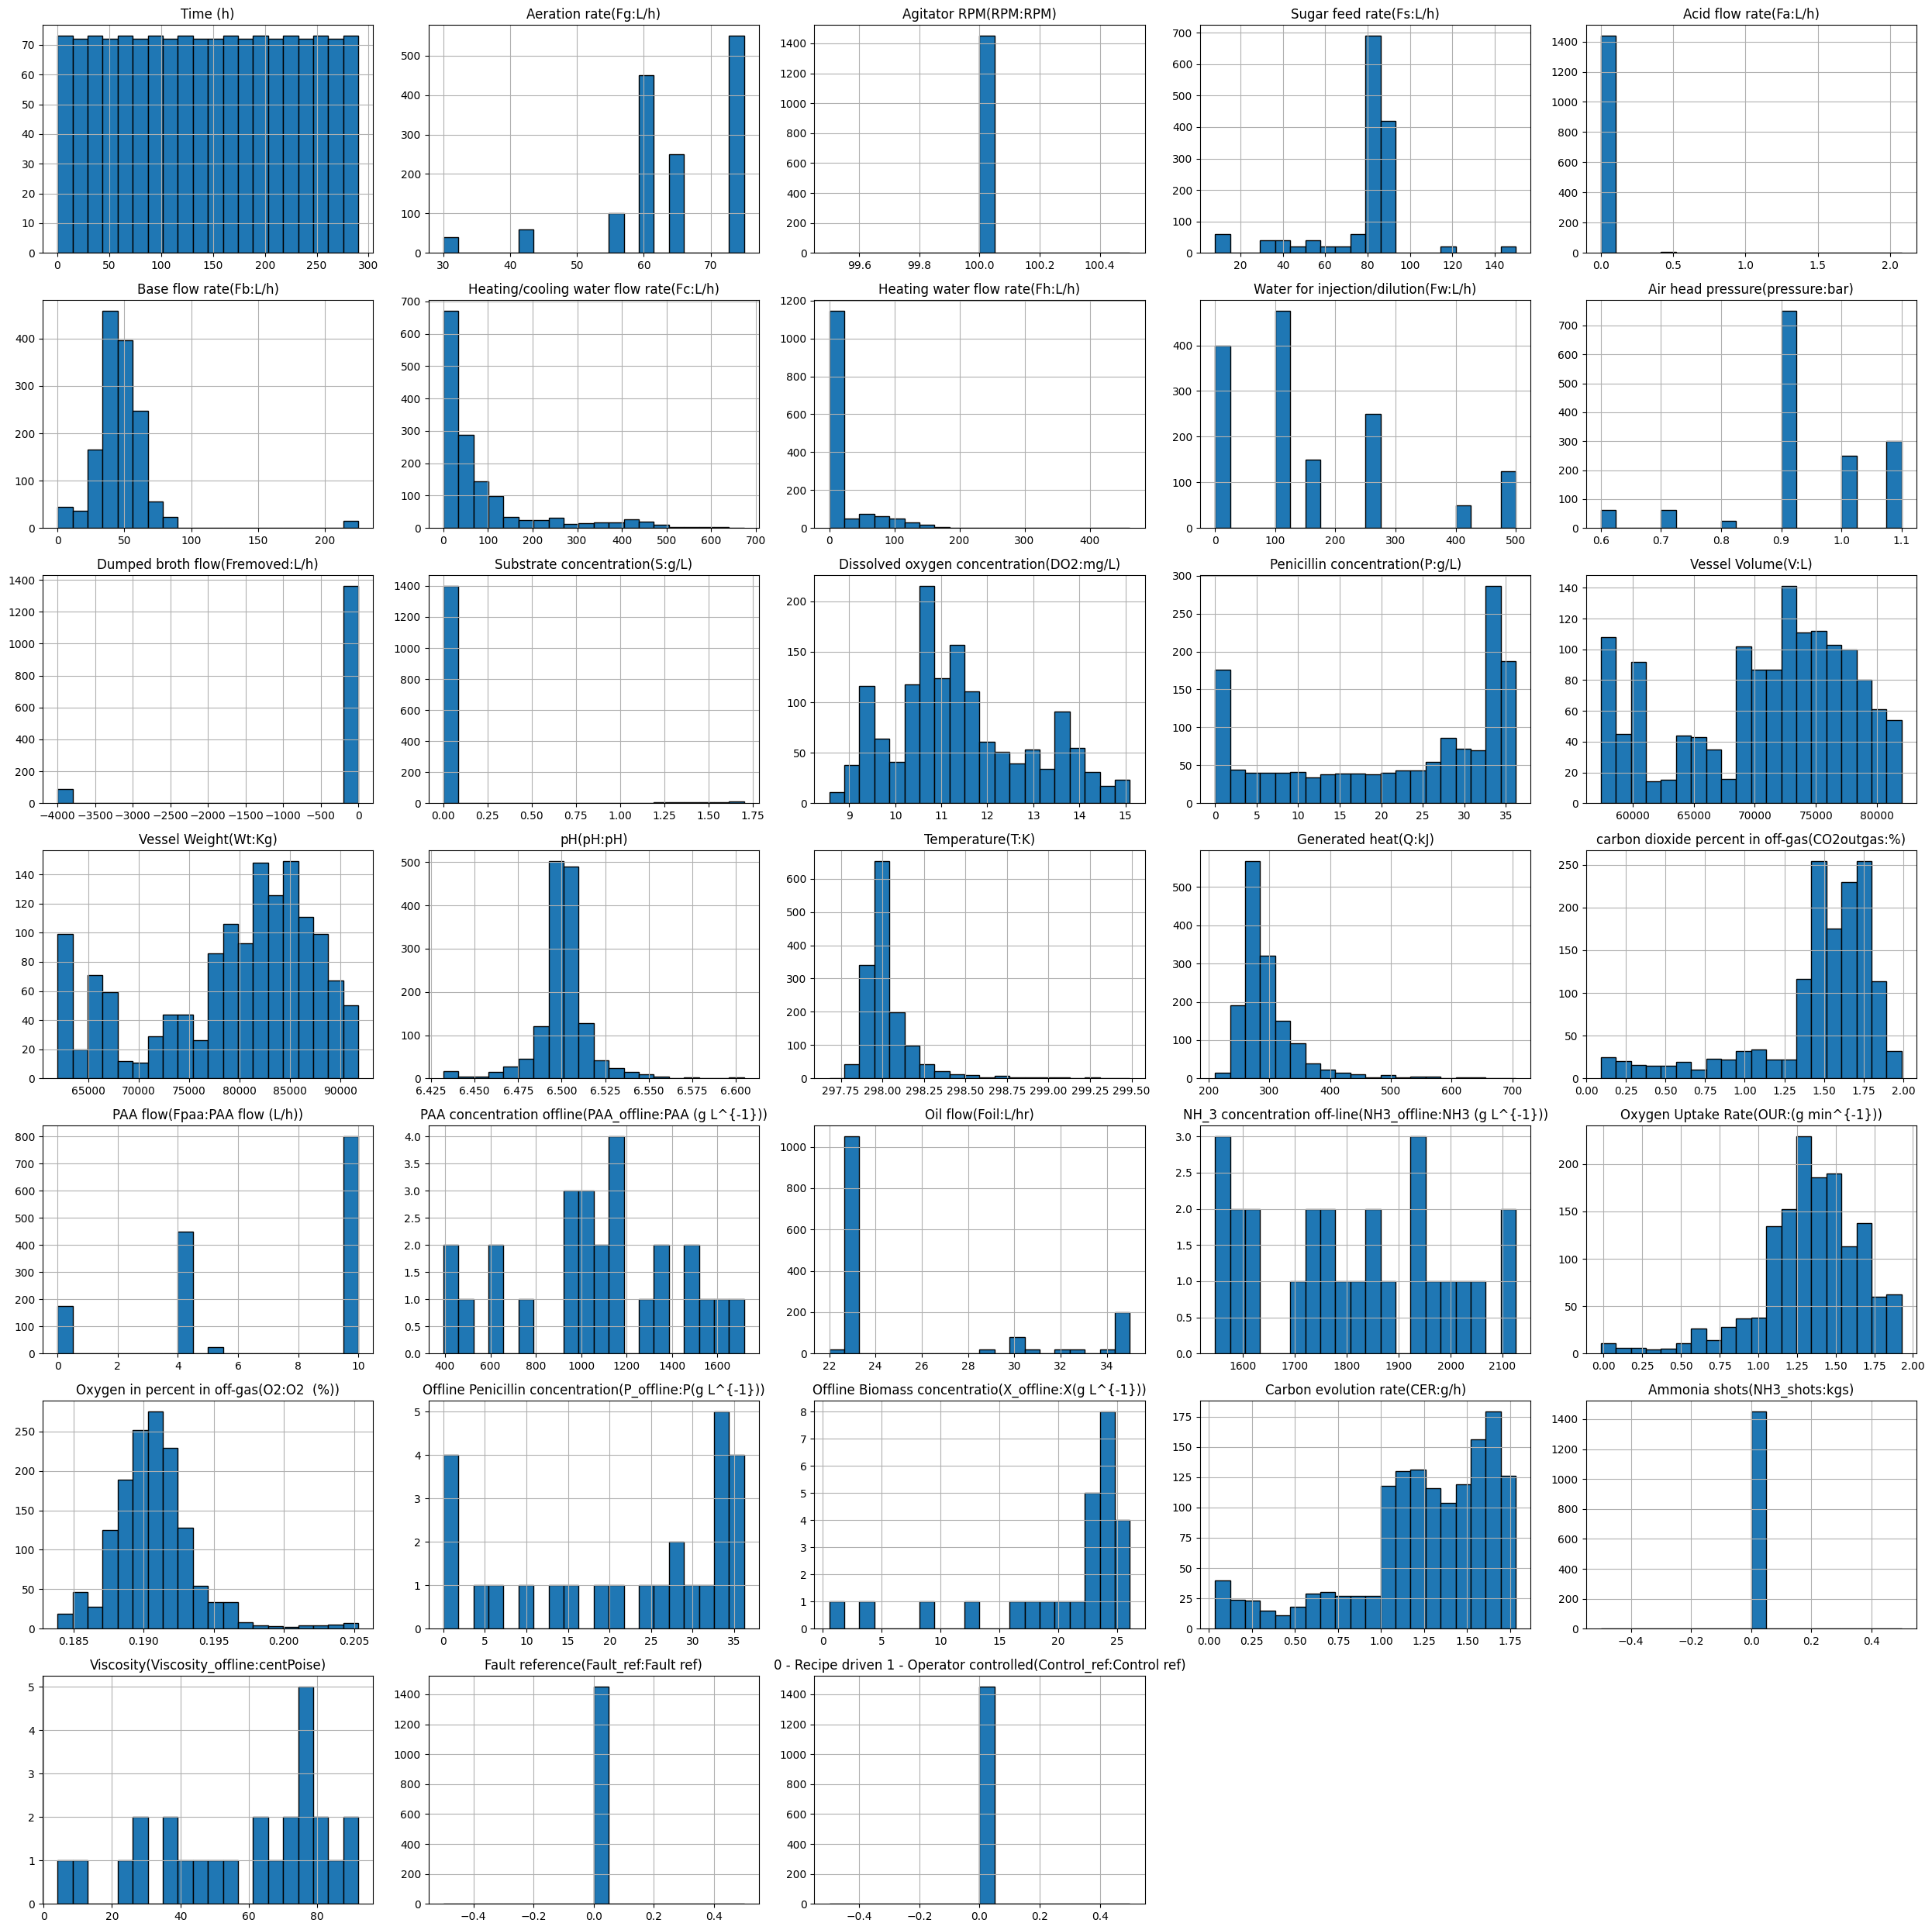

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()

for i, var in enumerate(batch_29_df.columns):
    ax = axes[i]
    ax.hist(batch_29_df[var], bins=20, edgecolor='k')
    ax.set_title(var)
    ax.grid(True)

for i in range(len(batch_29_df.columns), 35):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [128]:
batch_29_df=batch_29_df.dropna()

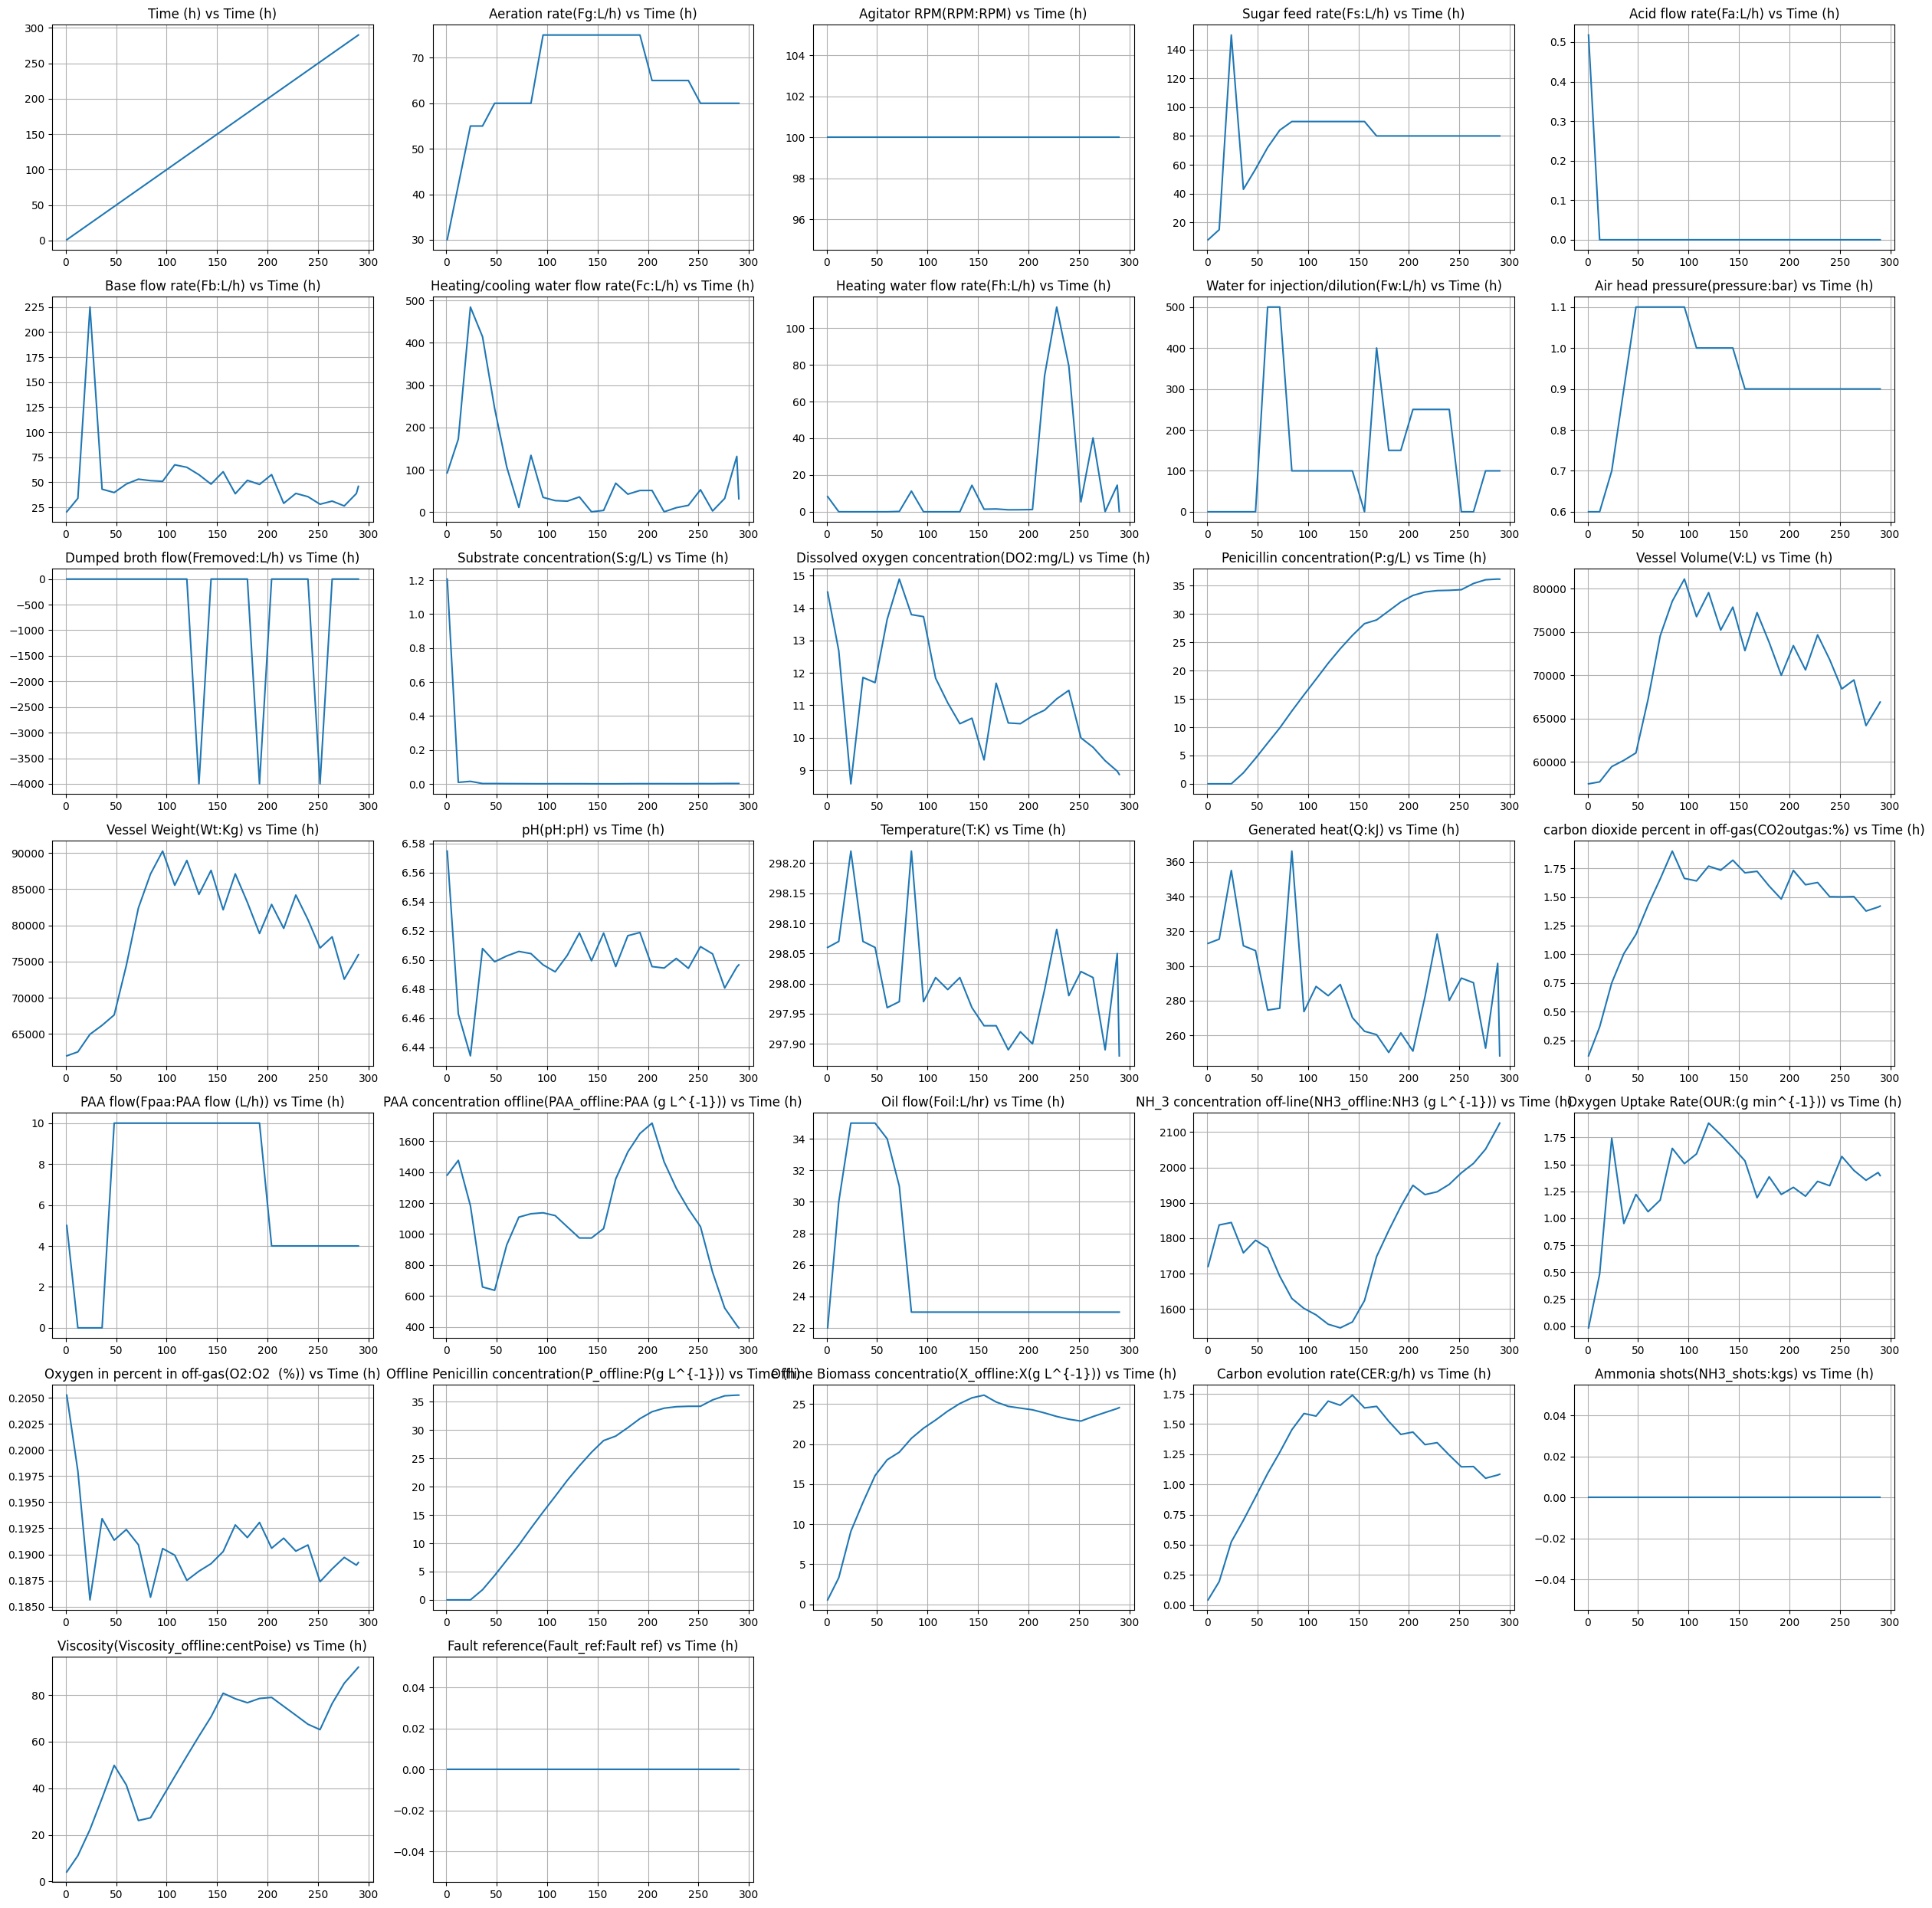

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()
# Graficar cada variable en función del tiempo
for i, var in enumerate(batch_29_df.columns):
    if var != 'time':
        ax = axes[i]
        ax.plot(batch_29_df['Time (h)'], batch_29_df[var], label=var)
        ax.set_title(f'{var} vs Time (h)')
        ax.grid(True)

for i in range(len(batch_29_df.columns) - 1, 35):  # -1 porque no se debe graficar la columna 'time'
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

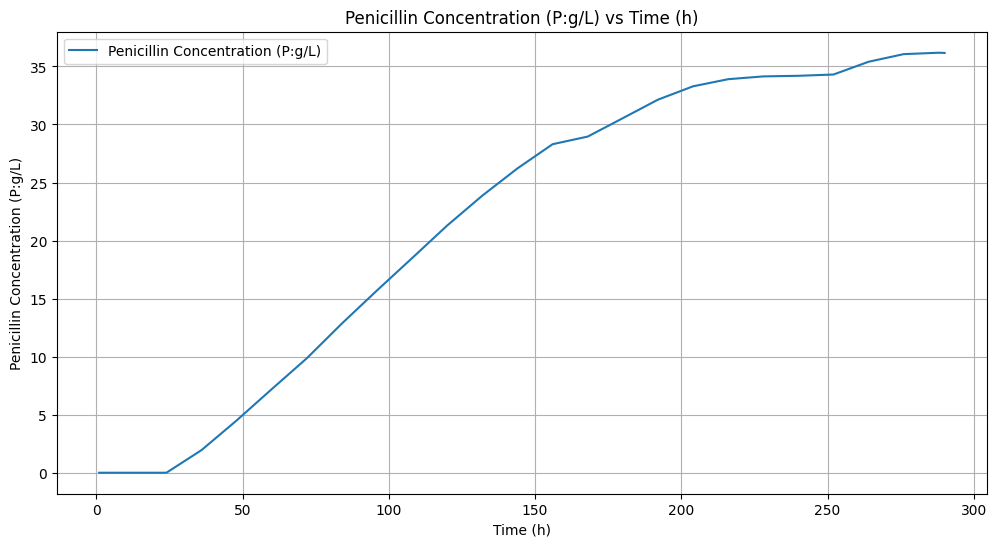

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(batch_29_df['Time (h)'], batch_29_df['Penicillin concentration(P:g/L)'], label='Penicillin Concentration (P:g/L)')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin Concentration (P:g/L)')
plt.title('Penicillin Concentration (P:g/L) vs Time (h)')
plt.legend()
plt.grid(True)
plt.show()

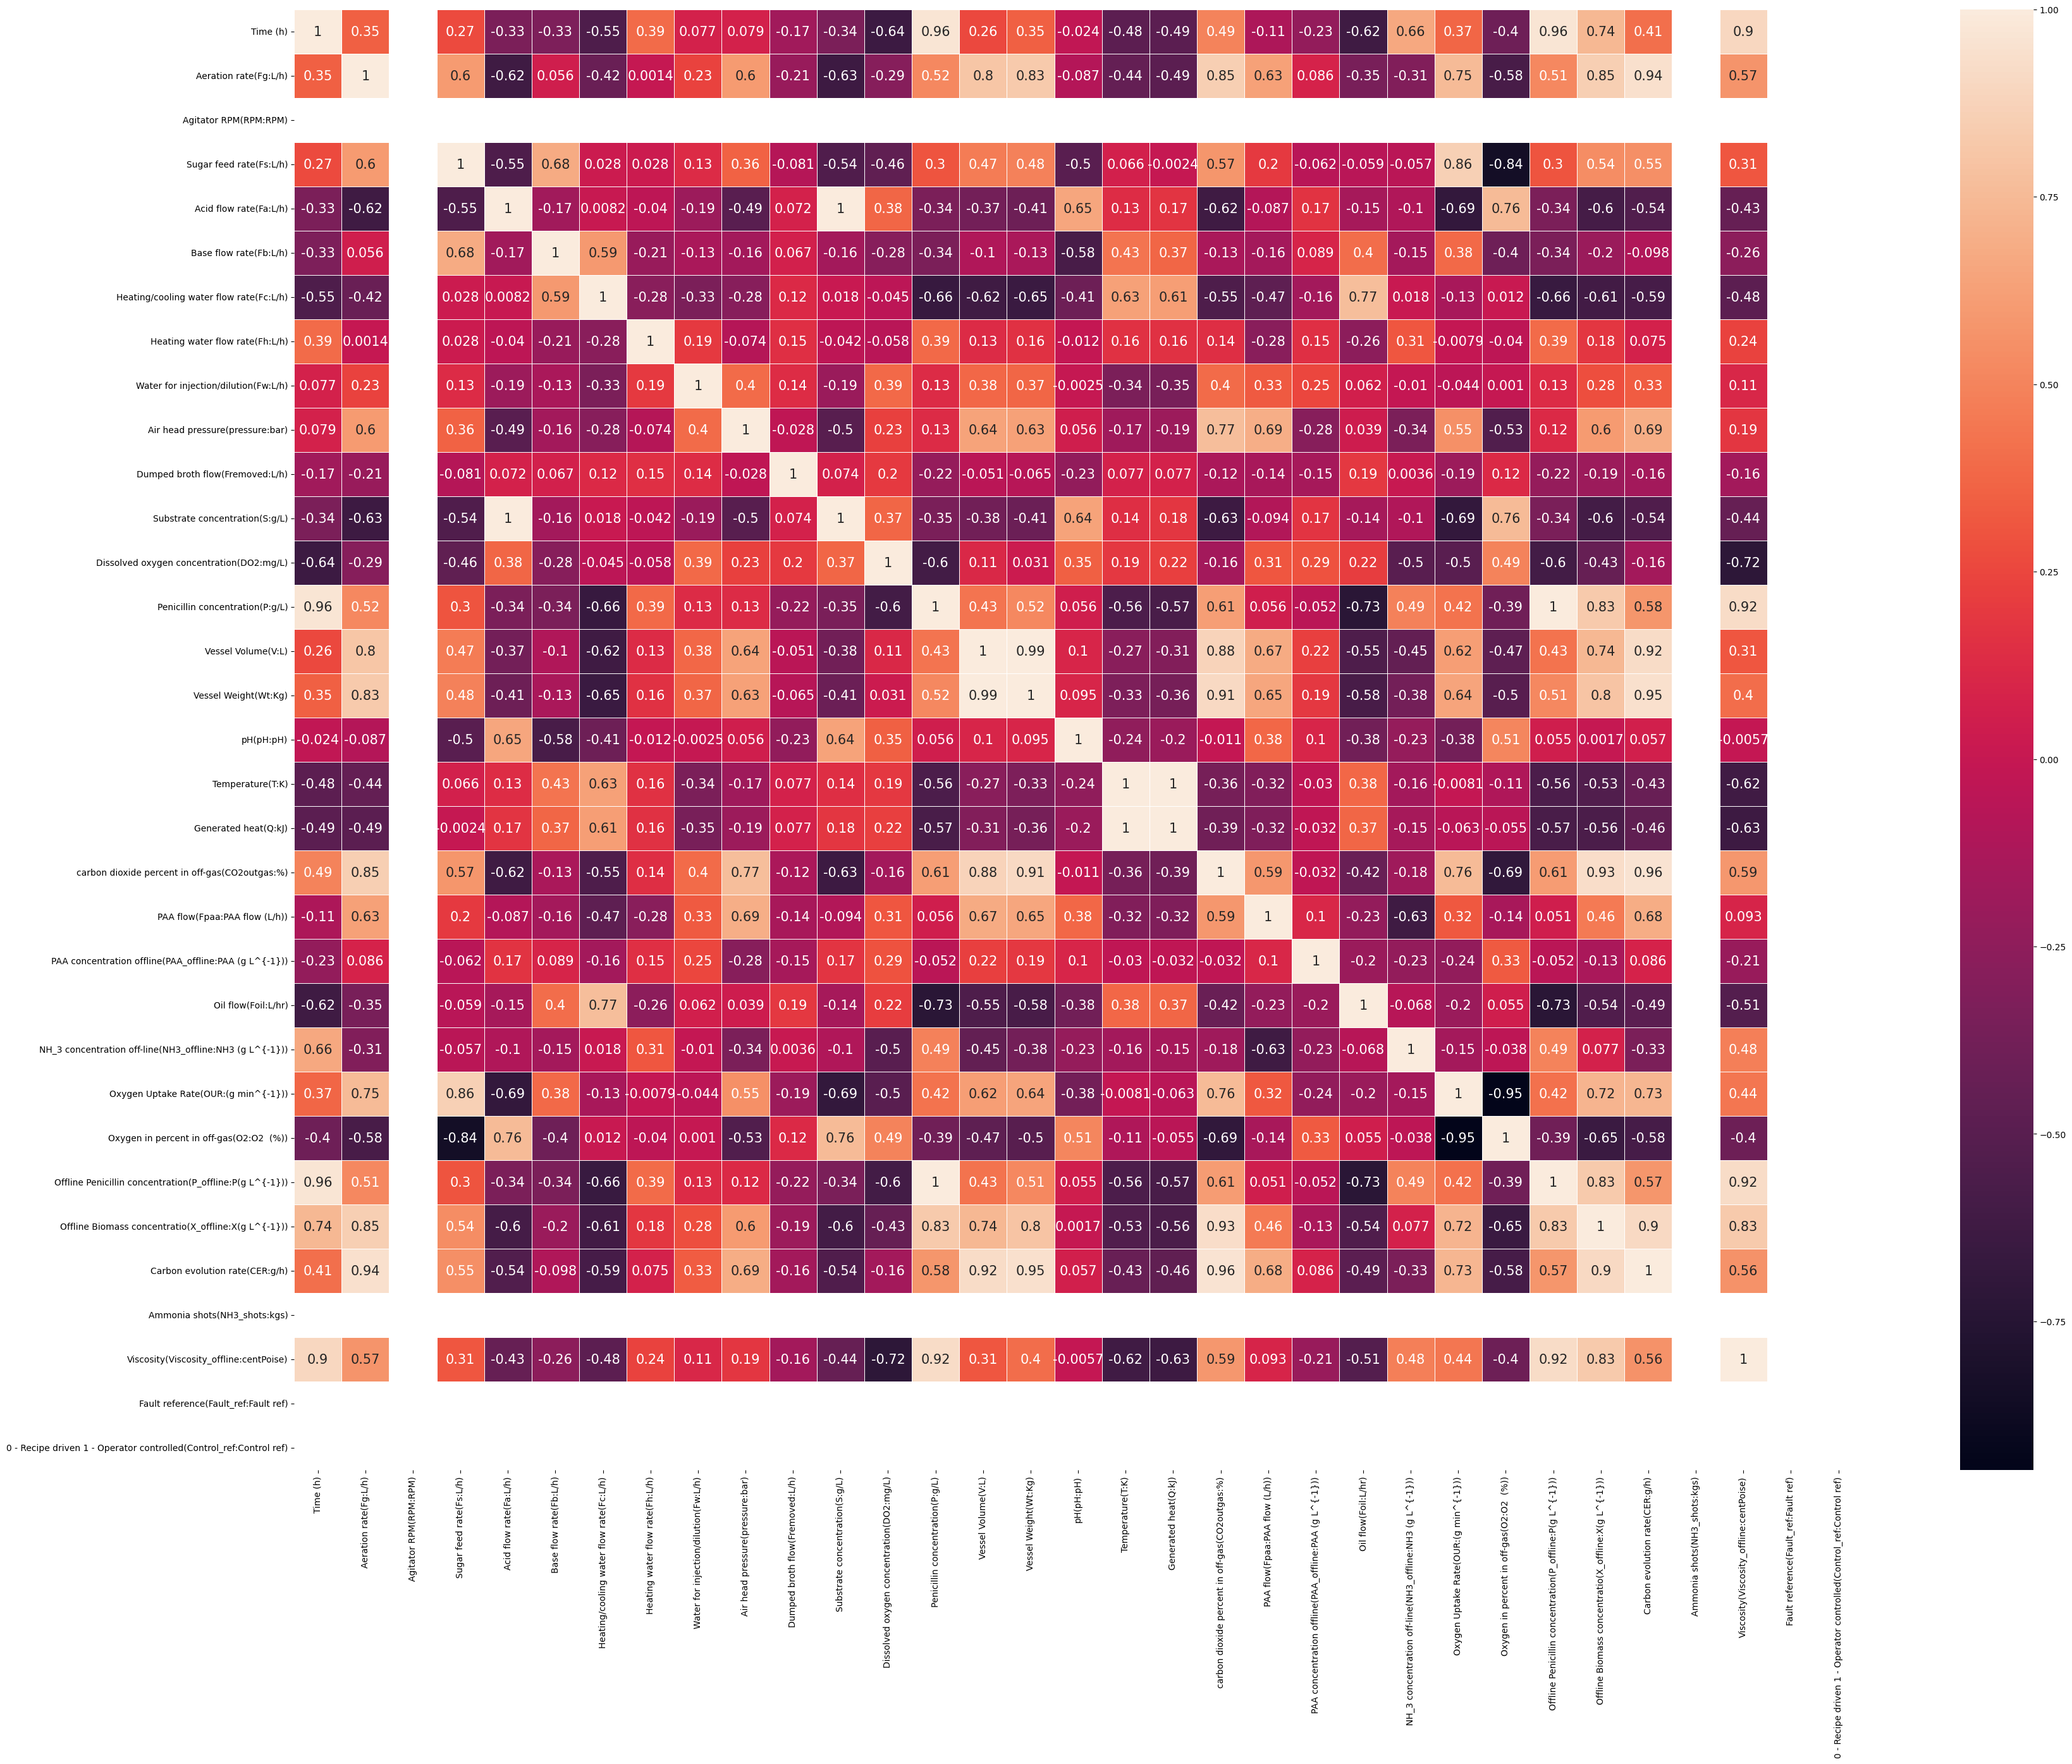

In [ ]:
fig, ax = plt.subplots(figsize=(40, 30))

sns.heatmap(data=batch_29_df.corr(), annot=True, annot_kws={"size": 15}, linewidths=0.5, linecolor="white")
plt.show()


In [132]:
print(batch_29_df.corr()['Penicillin concentration(P:g/L)'].abs().sort_values(ascending=False))

Penicillin concentration(P:g/L)                                       1.000000
Offline Penicillin concentration(P_offline:P(g L^{-1}))               0.999984
Time (h)                                                              0.964175
Viscosity(Viscosity_offline:centPoise)                                0.921357
Offline Biomass concentratio(X_offline:X(g L^{-1}))                   0.829267
Oil flow(Foil:L/hr)                                                   0.730725
Heating/cooling water flow rate(Fc:L/h)                               0.660266
carbon dioxide percent in off-gas(CO2outgas:%)                        0.612571
Dissolved oxygen concentration(DO2:mg/L)                              0.598997
Carbon evolution rate(CER:g/h)                                        0.578800
Generated heat(Q:kJ)                                                  0.570176
Temperature(T:K)                                                      0.557957
Aeration rate(Fg:L/h)                               